In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import opendatasets as od
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# download dataset
od.download("https://www.kaggle.com/datasets/ninadmehendale/multimodal-iris-fingerprint-biometric-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaveesham
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ninadmehendale/multimodal-iris-fingerprint-biometric-data


100%|██████████| 34.5M/34.5M [00:00<00:00, 88.2MB/s]


In [9]:
# import os
# import shutil

# # Base path for folders (modify if needed)
# base_path = "/content/multimodal-iris-fingerprint-biometric-data/IRIS and FINGERPRINT DATASET"

# # Destination path for extracted fingerprints (modify if needed)
# destination_path = "/content/extract"
# subfolders = ["right", "left"]
# # Loop through folders 1-45
# for folder_num in range(1, 46):
#   # Construct source path for "Fingerprint" folder

#   source_path = os.path.join(base_path, str(folder_num), "Fingerprint")

#   # Check if source path exists
#   if os.path.exists(source_path):
#     # Extract the folder (if it exists)
#     if os.path.isdir(source_path):  # Double-check if it's a directory
#       # Create destination path if it doesn't exist (prevents overwriting)
#       destination_folder_path = os.path.join(destination_path, str(folder_num))
#       os.makedirs(destination_folder_path, exist_ok=True)

#       # Extract using shutil.move to preserve folder structure
#       destination_fingerprint_path = os.path.join(destination_folder_path, "Fingerprint")
#       shutil.move(source_path, destination_fingerprint_path)
#       print(f"Eyes folder extracted from folder {folder_num} successfully!")
#   else:
#     print(f"Eyes folder not found in folder {folder_num}!")

# print("Eyes extraction from all folders completed!")


In [10]:
import os
import shutil

# Base path for folders (modify if needed)
base_path = "/content/multimodal-iris-fingerprint-biometric-data/IRIS and FINGERPRINT DATASET"

# Destination path for extracted data (modify if needed)
destination_path = "/content/extract"

# Subfolders to extract (modify if needed)
subfolders = ["left", "right"]

# Loop through folders 1-45
for folder_num in range(1, 46):
  for subfolder in subfolders:
    # Construct source path for current subfolder
    source_path = os.path.join(base_path, str(folder_num), subfolder)

    # Check if source path exists
    if os.path.exists(source_path):
      # Extract the folder (if it exists)
      if os.path.isdir(source_path):  # Double-check if it's a directory
        # Create destination path if it doesn't exist (prevents overwriting)
        destination_folder_path = os.path.join(destination_path, str(folder_num))
        os.makedirs(destination_folder_path, exist_ok=True)

        # Create separate destination path for each subfolder
        destination_subfolder_path = os.path.join(destination_folder_path, subfolder)

        # Extract using shutil.move to preserve folder structure
        shutil.move(source_path, destination_subfolder_path)
        print(f"{subfolder} folder extracted from folder {folder_num} successfully!")
    else:
      print(f"{subfolder} folder not found in folder {folder_num}!")

print("Fingerprint and Eye data extraction from all folders completed!")


left folder extracted from folder 1 successfully!
right folder extracted from folder 1 successfully!
left folder extracted from folder 2 successfully!
right folder extracted from folder 2 successfully!
left folder extracted from folder 3 successfully!
right folder extracted from folder 3 successfully!
left folder extracted from folder 4 successfully!
right folder extracted from folder 4 successfully!
left folder extracted from folder 5 successfully!
right folder extracted from folder 5 successfully!
left folder extracted from folder 6 successfully!
right folder extracted from folder 6 successfully!
left folder extracted from folder 7 successfully!
right folder extracted from folder 7 successfully!
left folder extracted from folder 8 successfully!
right folder extracted from folder 8 successfully!
left folder extracted from folder 9 successfully!
right folder extracted from folder 9 successfully!
left folder extracted from folder 10 successfully!
right folder extracted from folder 10 su

In [11]:
short_names = [
  "Ace", "Ari", "Ash", "Bea", "Ben", "Bly", "Cam", "Cat", "Dax", "Echo",
  "Em", "Fox", "Gia", "Gus", "Jay", "Jem", "Kai", "Kit", "Liv", "Lux",
  "Mac", "May", "Max", "Nat", "Neo", "Nix", "Nax", "Pax", "Tax",
  "Pip", "Rae", "Ren", "Sam", "Scout", "Shay", "Skye", "Tate", "Ty", "Uma",
  "Val", "Wren", "Xander", "Yaz", "Zee"
]

In [12]:
# Ensure we have enough names (extend the list if needed)
if len(short_names) < 45:
  num_missing_names = 45 - len(short_names)
  additional_names = ["Extra" + str(i) for i in range(1, num_missing_names + 1)]
  short_names.extend(additional_names)

# Loop through folders and rename (modify path if needed)
base_path = "/content/extract/"
for folder_num in range(1, 46):
  folder_path = os.path.join(base_path, str(folder_num))
  new_name = short_names[folder_num - 1]  # Access name based on folder number
  os.rename(folder_path, os.path.join(base_path, new_name))

print("Folders renamed with short names!")

Folders renamed with short names!


In [13]:
import os
import re

def is_person_folder(name):
  """Checks if a folder name likely represents a person's name."""
  # Basic check for alphanumeric characters with optional spaces
  pattern = r"^[a-zA-Z\s]+$"
  return bool(re.match(pattern, name))

def list_people_folders(path):
  """Lists folders that likely represent people's names under a given path."""
  people_folders = []
  for entry in os.listdir(path):
    if os.path.isdir(os.path.join(path, entry)):
      if is_person_folder(entry):
        people_folders.append(entry)
  return people_folders

# Get the list of folders with people names
people_folders = list_people_folders("/content/extract")

# Print the list of folders
print(f"Folders with likely people names:")
for folder in people_folders:
  print(folder)


Folders with likely people names:
Liv
Tax
Nax
Zee
Max
Lux
Ren
Ben
Bly
Kai
Gus
Kit
Sam
Ari
Bea
Jay
Neo
Wren
Shay
Xander
Yaz
Ty
Rae
May
Tate
Gia
Val
Nix
Pax
Uma
Em
Echo
Nat
Dax
Cat
Ace
Mac
Pip
Jem
Fox
Cam
Ash
Scout
Skye


In [14]:
import os
import re

def is_person_folder(name):
  """Checks if a folder name likely represents a person's name."""
  # Basic check for alphanumeric characters with optional spaces
  pattern = r"^[a-zA-Z\s]+$"
  return bool(re.match(pattern, name))

def move_people_folders(source_path, target_path):
  """Moves folders with people names and their contents to the target directory."""
  for entry in os.listdir(source_path):
    if os.path.isdir(os.path.join(source_path, entry)):
      if is_person_folder(entry):
        source_dir = os.path.join(source_path, entry)
        target_dir = os.path.join(target_path, entry)
        # Move the entire directory (including contents)
        os.replace(source_dir, target_dir)

# Source directory containing folders (replace with your actual path)
source_path = "/content/extract"

# Target directory to move folders to (replace with your desired path)
target_path = "/content/train"

# Create the target directory if it doesn't exist
os.makedirs(target_path, exist_ok=True)

# Move the people folders with their contents
move_people_folders(source_path, target_path)

print(f"Folders with people names and their contents moved to: {target_path}")


Folders with people names and their contents moved to: /content/train


In [15]:
# import os
# import pandas as pd

# def create_fingerprint_dataframe(data_dir):
#   """Creates a DataFrame containing names and fingerprint image paths (if any)."""
#   data = []
#   for person_dir in os.listdir(data_dir):
#     if os.path.isdir(os.path.join(data_dir, person_dir)):
#       person_name = person_dir
#       fingerprint_dir = os.path.join(data_dir, person_dir, "Fingerprint")  # Assuming "Fingerprint" subfolder
#       image_paths = []
#       if os.path.isdir(fingerprint_dir):  # Check if fingerprint directory exists
#         for filename in os.listdir(fingerprint_dir):
#           if filename.endswith(".bmp"):
#             image_path = os.path.join(fingerprint_dir, filename)
#             image_paths.append(image_path)
#       data.append({'name': person_name, 'img': image_paths})  # Include image paths even if empty
#   df = pd.DataFrame(data)
#   return df

# # Specify the data directory (replace with your actual path)
# data_dir = "/content/train"

# # Create the DataFrame
# fingerprint_df = create_fingerprint_dataframe(data_dir)

# # Print the DataFrame
# print(fingerprint_df)


In [16]:
import os
import pandas as pd


def create_multimodal_dataframe(data_dir):
  """Creates a DataFrame containing names, fingerprint paths (if any), and eye paths (if any)."""
  data = []
  for person_dir in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, person_dir)):
      person_name = person_dir
      fingerprint_paths = []
      eye_paths = []

      # Fingerprint path handling
      fingerprint_dir = os.path.join(data_dir, person_dir, "right")
      if os.path.isdir(fingerprint_dir):
        for filename in os.listdir(fingerprint_dir):
          if filename.endswith(".bmp"):
            image_path = os.path.join(fingerprint_dir, filename)
            fingerprint_paths.append(image_path)

      # Eye path handling (modify subfolder name if needed)
      eye_dir = os.path.join(data_dir, person_dir, "left")  # Assuming "Eye" subfolder
      if os.path.isdir(eye_dir):
        for filename in os.listdir(eye_dir):
          if filename.endswith(".bmp") or filename.endswith(".png"):  # Adjust for eye image formats
            image_path = os.path.join(eye_dir, filename)
            eye_paths.append(image_path)

      # Create dictionary with name, fingerprint paths, and eye paths (even if empty)
      data.append({'name': person_name, 'left_img': fingerprint_paths, 'right_img': eye_paths})

  df = pd.DataFrame(data)
  return df


# Specify the data directory (replace with your actual path)
data_dir = "/content/train"

# Create the DataFrame
multimodal_df = create_multimodal_dataframe(data_dir)

# Print the DataFrame (optional)
print(multimodal_df)


      name                                           left_img  \
0      Liv  [/content/train/Liv/right/masr1.bmp, /content/...   
1      Tax  [/content/train/Tax/right/philipr4.bmp, /conte...   
2      Nax  [/content/train/Nax/right/ongblr3.bmp, /conten...   
3      Zee  [/content/train/Zee/right/zaridahr2.bmp, /cont...   
4      Max  [/content/train/Max/right/ngkokwhyr2.bmp, /con...   
5      Lux  [/content/train/Lux/right/mazwanr5.bmp, /conte...   
6      Ren  [/content/train/Ren/right/sarinar5.bmp, /conte...   
7      Ben  [/content/train/Ben/right/christiner2.bmp, /co...   
8      Bly  [/content/train/Bly/right/chualsr2.bmp, /conte...   
9      Kai  [/content/train/Kai/right/mahskr2.bmp, /conten...   
10     Gus  [/content/train/Gus/right/loker4.bmp, /content...   
11     Kit  [/content/train/Kit/right/maranr2.bmp, /conten...   
12     Sam  [/content/train/Sam/right/sitir4.bmp, /content...   
13     Ari  [/content/train/Ari/right/bryanr2.bmp, /conten...   
14     Bea  [/content/tra

In [18]:
multimodal_df.dtypes


name         object
left_img     object
right_img    object
dtype: object

lable encode

In [20]:
column_to_encode = 'name'
encoder = LabelEncoder()
multimodal_df[column_to_encode] = encoder.fit_transform(multimodal_df[column_to_encode])

# Print the DataFrame after encoding
multimodal_df.head(5)

,name,left_img,right_img
0,18,"[/content/train/Liv/right/masr1.bmp, /content/...","[/content/train/Liv/left/masl4.bmp, /content/t..."
1,36,"[/content/train/Tax/right/philipr4.bmp, /conte...","[/content/train/Tax/left/philipl5.bmp, /conten..."
2,24,"[/content/train/Nax/right/ongblr3.bmp, /conten...","[/content/train/Nax/left/ongbll2.bmp, /content..."
3,43,"[/content/train/Zee/right/zaridahr2.bmp, /cont...","[/content/train/Zee/left/zaridahl2.bmp, /conte..."
4,21,"[/content/train/Max/right/ngkokwhyr2.bmp, /con...","[/content/train/Max/left/ngkokwhyl3.bmp, /cont..."


In [21]:
multimodal_df.dtypes

name          int64
left_img     object
right_img    object
dtype: object

In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation,Dropout
img_width, img_height = 128,128

In [23]:
def get_fingerprint_paths(data_dir):
  """Creates a dictionary mapping person names to lists of fingerprint image paths."""
  fingerprint_paths = {}
  for person_dir in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, person_dir)):
      person_name = person_dir
      image_paths = []
      for filename in os.listdir(os.path.join(data_dir, person_dir)):
        if filename.endswith(".bmp"):
          image_path = os.path.join(data_dir, person_dir, filename)
          image_paths.append(image_path)
      if image_paths:
        fingerprint_paths[person_name] = image_paths
  return fingerprint_paths

# def split_data(fingerprint_paths, test_size=0.2, val_size=0.2):
#   """Splits the fingerprint data into training, validation, and test sets."""
#   X_train = train_test_split(
#       list(fingerprint_paths.keys()),  # Person names as labels
#       list(fingerprint_paths.values()),  # List of image paths per person
#       test_size=test_size,
#       random_state=42
#   )

#   X_train = train_test_split(
#      random_state=42
#   )

#   return (X_train)




In [24]:
# Specify data directory path (replace with your actual path)
data_dir = "/content/train"  # Assuming your data is in Colab

# Get fingerprint paths with person names as keys and image paths as lists
fingerprint_paths = get_fingerprint_paths(data_dir)

# Define image size (adjust if your images have different dimensions)
image_size = (128, 128)

# Split data into training, validation, and test sets
#(X_train, X_val, X_test, y_train, y_val, y_test) = split_data(fingerprint_paths, test_size=0.2, val_size=0.2)

# Create data generators for training, validation, and testing (optional for large datasets)
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,  # Replace with actual data directory (containing subfolders for people)
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    #subset='training'  # Only training data
)


Found 440 images belonging to 44 classes.


In [23]:
#input_shape = image_size

In [24]:
# def create_cnn_model(image_size=(input_shape)):
#   """Creates a basic CNN model for fingerprint classification."""
#   model = Sequential()
#   model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_size + (3,)))  # Input with 3 color channels (RGB)
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Conv2D(64, (3, 3), activation='relu'))
#   model.add(MaxPooling2D((2, 2)))
#   model.add(Flatten())
#   model.add(Dense(64, activation='relu'))  # Adjust number of units as needed
#   model.add(Dense(len(data_dir), activation='softmax'))  # Output layer with num_classes

#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   #model.fit(train_generator, epochs = 20)
#   return model



In [25]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(44))
model.add(Activation('softmax'))

In [40]:
data_dir

'/content/train'

In [26]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [20]:
#model=create_cnn_model()


In [27]:
model.fit(train_generator, epochs = 23)

Epoch 1/23
14/14 [==============================] - 7s 401ms/step - loss: 3.8102 - accuracy: 0.0227
Epoch 2/23
14/14 [==============================] - 7s 454ms/step - loss: 3.7854 - accuracy: 0.0205
Epoch 3/23
14/14 [==============================] - 5s 382ms/step - loss: 3.7761 - accuracy: 0.0318
Epoch 4/23
14/14 [==============================] - 6s 399ms/step - loss: 3.7411 - accuracy: 0.0295
Epoch 5/23
14/14 [==============================] - 7s 486ms/step - loss: 3.6056 - accuracy: 0.0636
Epoch 6/23
14/14 [==============================] - 6s 394ms/step - loss: 3.4453 - accuracy: 0.0818
Epoch 7/23
14/14 [==============================] - 7s 474ms/step - loss: 3.2981 - accuracy: 0.1159
Epoch 8/23
14/14 [==============================] - 6s 445ms/step - loss: 3.1741 - accuracy: 0.1545
Epoch 9/23
14/14 [==============================] - 8s 574ms/step - loss: 2.9063 - accuracy: 0.2068
Epoch 10/23
14/14 [==============================] - 5s 388ms/step - loss: 2.7642 - accuracy: 0.2500

In [28]:
model.save("eye_detector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction model


In [29]:
!pip install opencv-python -q

In [30]:

import cv2

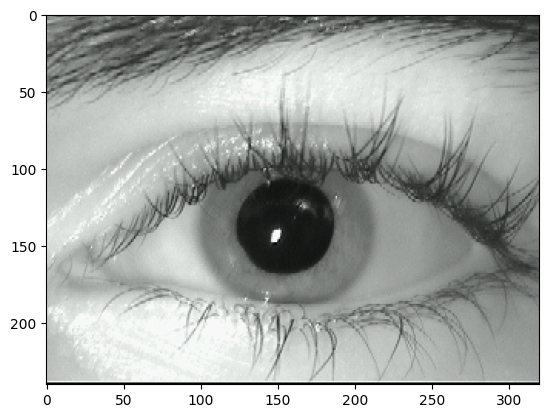

In [42]:
img = cv2.imread('/content/train/Kit/left/maranl1.bmp')
plt.imshow(img)
plt.show()

In [43]:
IMAGE_SIZE=(128,128)
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255
scaled_image.shape

TensorShape([128, 128, 3])

In [44]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [45]:
yhat = model.predict(np.expand_dims(scaled_image, 0))
yhat

1/1 [==============================] - 0s 25ms/step


array([[4.34982870e-03, 7.88249963e-06, 4.36051574e-04, 1.00365673e-04,
        1.78836723e-04, 5.02057410e-05, 1.90410472e-03, 9.73569637e-04,
        5.03493473e-04, 6.82379732e-06, 7.60304334e-04, 9.46118776e-03,
        4.65813027e-05, 3.81011996e-05, 5.33305774e-06, 1.26726329e-04,
        2.86652335e-06, 9.47128177e-01, 2.41627895e-05, 6.40460290e-04,
        1.47610663e-05, 5.29996942e-06, 7.55873486e-07, 3.25176225e-05,
        1.20105367e-04, 2.49157511e-05, 3.37625039e-04, 6.62150997e-05,
        2.97431652e-05, 1.03437528e-03, 2.61517544e-03, 1.40098855e-05,
        9.01869498e-05, 2.49034464e-02, 9.89529799e-05, 1.04192977e-05,
        5.95911522e-04, 7.48216466e-04, 9.82004800e-04, 1.01355638e-03,
        2.13927360e-05, 4.61334828e-04, 1.69845025e-05, 1.70261828e-05]],
      dtype=float32)

In [46]:
import numpy as np

# Sample prediction (replace with your actual prediction)
#prediction = np.array([[0.06690496, 0.02664575, 0.06709774, ... , 0.00322813, 0.0118737 , 0.00681786, 0.07588106]])
prediction=yhat
# Sample class labels (replace with your actual list of names)
class_labels = [
  "Ace", "Ari", "Ash", "Bea", "Ben", "Bly", "Cam", "Cat", "Dax", "Echo",
  "Em", "Fox", "Gia", "Gus", "Jay", "Jem", "Kai", "Kit", "Liv", "Lux",
  "Mac", "May", "Max", "Nat", "Neo", "Nix", "Nax", "Pax", "Tax",
  "Pip", "Rae", "Ren", "Sam", "Scout", "Shay", "Skye", "Tate", "Ty", "Uma",
  "Val", "Wren", "Xander", "Yaz", "Zee"
]  # Assuming these correspond to prediction classes

# Find the index of the highest probability in the prediction
predicted_index = np.argmax(prediction, axis=1)  # Assumes probabilities are in the first dimension

# Map the index to the corresponding name using class labels
predicted_name = class_labels[predicted_index[0]]  # Assuming you only have one prediction

print("Predicted name:", predicted_name)


Predicted name: Kit
